In [1]:
""" goal: analysis of kineamtics of trials.
method of making a summary heat map showing (1) direction bias and (2) frequency of 1st, 2nd touch..

NOTE: up to 2/26, these are the datasets:

200226 - pilot - 1
{'Trace (instant)', 'Trace (pursuit,track)'}
two_lines_anywhere - 256
200226 - pilot - 3
{'Trace (instant)'}
two_lines_anywhere - 83


# MO:
200222 - pilot - 4
{'Trace (pursuit,track)'}
two_lines_anywhere - 4
200222 - pilot - 5
{'Trace (pursuit,track)'}
two_lines_anywhere - 53
200222 - pilot - 6
{'Trace (pursuit,track)'}
two_lines_anywhere - 58
200222 - pilot - 7
{'Trace (pursuit,track)'}
two_lines_anywhere - 42

"""


' goal: analysis of kineamtics of trials.\nmethod of making a summary heat map showing (1) direction bias and (2) frequency of 1st, 2nd touch..\n\n'

In [1]:

%load_ext autoreload
%autoreload 2

from tools.utils import * 
from tools.plots import *
from tools.analy import *
from tools.calc import *
from tools.analyplot import *

NOTE: need to not overwrite strokes_all_task, because then the orders saved will stop being accurate. Modify


In [171]:
animal = "Pancho";
date = 200226
expt = "pilot"
session = 1

from tools.preprocess import *
filedata = loadSingleData(animal, date, expt, session, resave_as_dict=False, load_resaved_data=True, 
                      resave_overwrite=False)

from tools.utils import *
getMultTrialsTaskStages(filedata)

found one matching filename: ['/data2/animals/Pancho/200226/200226_121930_pilot_Pancho_1.h5']
found one matching filename: ['/data2/animals/Pancho/200226/200226_121930_pilot_Pancho_1.pkl']
-- loaded presaved data: /data2/animals/Pancho/200226/200226_121930_pilot_Pancho_1.pkl
got 617 total trials


{'two_lines_natural': 20,
 'circle_partial': 172,
 'three_lines_natural': 19,
 'line': 116,
 'two_lines_anywhere': 256,
 'one_dot': 28,
 'line_natural': 6}

In [153]:
# -- collect d## FILTER TO FIND GOOD TRIALS, - PLOT THOSE
# --- for a given set of trials, collect trajectories for all of them

targ = {
    "task_stage":["line", "two_lines_natural", "line_natural", "three_lines_natural", "two_lines_anywhere"],
    "task_stage":["two_lines_anywhere"],
    "fracsuccess_min":[0.2]
}

trials_list = getIndsTrials(filedata, targ)


got 163 total trials


In [154]:
def _getStrokeDict(removeShort=True, trials_list=trials_list):
    # 1) load and preprocess
    stroke_dict = getMultTrialsStrokeDict(filedata, trials_list)
    if removeShort:
        # 2) remove short segments
        stroke_dict = processRemoveShortStrokes(stroke_dict)
        stroke_dict = processFilterDat(stroke_dict, {"not_empty":[]}, None)
    return stroke_dict

stroke_dict = _getStrokeDict()
# 3) reorder task strokes
stroke_dict = processReorderStrokes(stroke_dict, filedata)
# 4) update timestamps
stroke_dict = processFakeTimesteps(stroke_dict, filedata, key_to_do="strokes_all_task", ver="from_first_touch",
                                  replace_key_to_do=True)
stroke_dict = processFakeTimesteps(stroke_dict, filedata, key_to_do="strokes_all_task", ver="from_end_of_previous_stroke",
                                  replace_key_to_do=True)
# 5) get angles of task
stroke_dict = processAngles(stroke_dict, stroke_to_use="first", force_use_two_points=True)



[getTrialsStrokes] removing stroke for calc vel since shorter than window
NOTE: replaced strokes_all_task with values in strokes_all_task_faketime
NOTE: replaced strokes_all_task with values in strokes_all_task_faketime


got 51 total trials
[getTrialsStrokes] removing stroke for calc vel since shorter than window
[getTrialsStrokes] removing stroke for calc vel since shorter than window


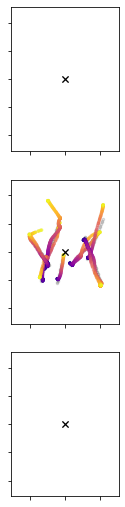

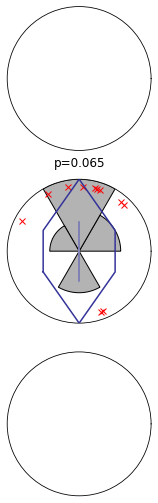

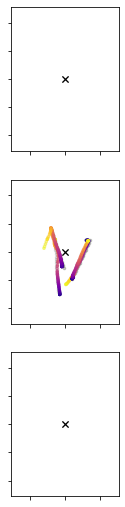

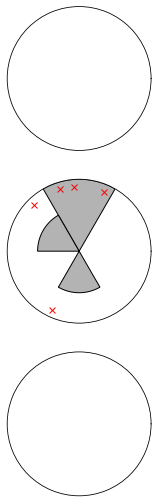

In [170]:
## GOOD - 2-strokes, separately plotted dependning on second stroke

targ = {
    "task_stage":["two_lines_anywhere"],
    "behtype":["Trace (instant)"],
    "fracsuccess_min":[0.6]
}
trials_list = getIndsTrials(filedata, targ)

from tools.analy import processCenters, processFilterDat
from tools.analyplot import plotDictGridOverlay

MATCH_SUBJ_TASK_FIRST_STROKE=True # to look at within stroke dynamics
REMOVESHORT=False
from math import pi

for f in [{"center_s0_d1":[0.35, 0.65],  "center_s1_d1":[0.5, 1]},
          {"center_s0_d1":[0.35, 0.65],  "center_s1_d1":[0, 0.5]}]:
# for f in [{"center_s0_d0":[0.4, 0.6],  "center_s1_d0":[0.6, 1]},
#           {"center_s0_d0":[0.4, 0.6],  "center_s1_d0":[0, 0.4]}]:
    
#     f["angletask_s0"]=[-pi/4, pi/4]
#     f["angletask_s0"]=[3*pi/4, 5*pi/4]
    f["angletaskbin_s0"]=[2,3,6,7]
#     f["angletaskbin_s0"]=[1,4,5,8]

    # 1) reorder task strokes so that match order of beahvior
    stroke_dict = _getStrokeDict(removeShort=REMOVESHORT, trials_list=trials_list)
    
    # i) reorder all of the task strokes [i.e., based on a model]
    if MATCH_SUBJ_TASK_FIRST_STROKE:
        stroke_dict = processReorderStrokes(stroke_dict, filedata, method="distance",
                                                 reassign_timestamps=False)
    else:
        stroke_dict = processReorderStrokes(stroke_dict, filedata, method="prox_to_origin",
                                                 reassign_timestamps=False)
    # # ii) reassign time stamps for task strokes, so that match behavior best
    # stroke_dict = processFakeTimesteps(stroke_dict, filedata, ver="from_first_touch", replace_key_to_do=True)
    # stroke_dict = processFakeTimesteps(stroke_dict, filedata, ver="from_end_of_previous_stroke", replace_key_to_do=True)
    # iii) gets angles of strokes
    # stroke_dict = processAngles(stroke_dict)
    # iv) assign each subject stroke to a task stroke
    # stroke_dict = processAssignStrokes(stroke_dict, ver=VER)
    # v) get beh-model distances (posterior scores)
    # stroke_dict = processPosteriorScores(stroke_dict, filedata, method_prior="distance")

    stroke_dict = processCenters(stroke_dict)
    stroke_dict = processAngles(stroke_dict)
    stroke_dict = processFilterDat(stroke_dict, f, filedata=filedata)
    
    plotDictGridOverlay(stroke_dict, filedata, nbins_x=1)

In [ ]:
## WHAT IS SPATIAL DISTRUBUTION OF FIRST STROKES?

from tools.analyplot import plotDictGridOverlay

stroke_dict = _getStrokeDict(removeShort=False)
stroke_dict = processReorderStrokes(stroke_dict, filedata)

from tools.analy import processCenters, processFilterDat

MATCH_SUBJ_TASK_FIRST_STROKE=True # to look at within stroke dynamics
REMOVESHORT=False
from math import pi

for f in [{"center_s0_d1":[0.4, 0.6],  "center_s1_d1":[0.5, 1]},
          {"center_s0_d1":[0.4, 0.6],  "center_s1_d1":[0, 0.5]}]:
# for f in [{"center_s0_d0":[0.4, 0.6],  "center_s1_d0":[0.6, 1]},
#           {"center_s0_d0":[0.4, 0.6],  "center_s1_d0":[0, 0.4]}]:
    
#     f["angletask_s0"]=[-pi/4, pi/4]
#     f["angletask_s0"]=[3*pi/4, 5*pi/4]
    f["angletaskbin_s0"]=[2,3,6,7]
#     f["angletaskbin_s0"]=[1,4,5,8]

    # 1) reorder task strokes so that match order of beahvior
    stroke_dict = _getStrokeDict(removeShort=REMOVESHORT)
    
    # i) reorder all of the task strokes [i.e., based on a model]
    if MATCH_SUBJ_TASK_FIRST_STROKE:
        stroke_dict = processReorderStrokes(stroke_dict, filedata, method="distance",
                                                 reassign_timestamps=False)
    else:
        stroke_dict = processReorderStrokes(stroke_dict, filedata, method="prox_to_origin",
                                                 reassign_timestamps=False)
    # # ii) reassign time stamps for task strokes, so that match behavior best
    # stroke_dict = processFakeTimesteps(stroke_dict, filedata, ver="from_first_touch", replace_key_to_do=True)
    # stroke_dict = processFakeTimesteps(stroke_dict, filedata, ver="from_end_of_previous_stroke", replace_key_to_do=True)
    # iii) gets angles of strokes
    # stroke_dict = processAngles(stroke_dict)
    # iv) assign each subject stroke to a task stroke
    # stroke_dict = processAssignStrokes(stroke_dict, ver=VER)
    # v) get beh-model distances (posterior scores)
    # stroke_dict = processPosteriorScores(stroke_dict, filedata, method_prior="distance")

    stroke_dict = processCenters(stroke_dict)
    stroke_dict = processAngles(stroke_dict)
    stroke_dict = processFilterDat(stroke_dict, f, filedata=filedata)
    
    plotDictGridOverlay(stroke_dict, filedata)

got 76 total trials
[getTrialsStrokes] removing stroke for calc vel since shorter than window


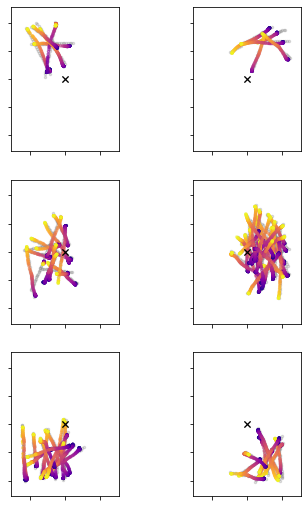

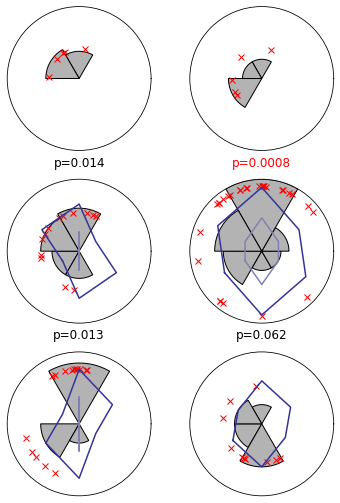

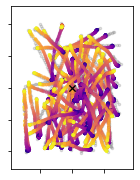

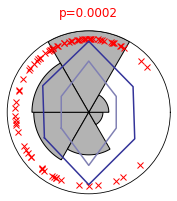

In [167]:
##  PLOT DISTRIBUTION OF STROKES FOR SINGLE LINE.

# === EXTRACT TRIALS
targ = {
    "task_stage":["line"],
    "behtype":["Trace (instant)"],
    "fracsuccess_min":[0.5]
}

trials_list = getIndsTrials(filedata, targ)

# === EXTRACT DATA
stroke_dict = _getStrokeDict(removeShort=False, trials_list=trials_list)


# === PLOT
plotDictGridOverlay(stroke_dict, filedata)
plotDictGridOverlay(stroke_dict, filedata, nbins_x=1, nbins_y=1)



In [155]:
from pythonlib.tools.plottools import rose_plot

In [68]:
def processCleanup(stroke_dict, field_to_check):
    """ variious things, like removing empty trials
    which can occur if e.g., removed short strokesa nd
    now nothing remians"""
    
    inds_to_remove = [i for i, s in enumerate(stroke_dict[field_to_check]) if len(s)==0]
    print(inds_to_remove)
    
processCleanup(stroke_dict, "stroke_centers")
    
    

[33, 58]


In [ ]:
## TRYING OUT OTHER DIRECTIONS - 
## ---- filter so that only get strokes whos centers are within some bounding area
from tools.analy import processCenters, processFilterDat

MATCH_SUBJ_TASK_FIRST_STROKE=True # to look at within stroke dynamics
REMOVESHORT=False
from math import pi
# for f in [{"center_s0_d0":[0.5, 1.0], "center_s0_d1":[0.5, 1.0], "center_s1_d0":[0, 0.5], "center_s1_d1":[0.5, 1]},
#           {"center_s0_d0":[0.5, 1.0], "center_s0_d1":[0.5, 1.0], "center_s1_d0":[0.5, 1], "center_s1_d1":[0, 0.5], }]:
# for f in [{"center_s0_d0":[0.5, 1.0], "center_s0_d1":[0, 0.5], "center_s1_d0":[0.5, 1], "center_s1_d1":[0.5, 1]},
#           {"center_s0_d0":[0.5, 1.0], "center_s0_d1":[0, 0.5], "center_s1_d0":[0, 0.5], "center_s1_d1":[0, 0.5] }]:
for f in [{"center_s0_d0":[0, 0.5], "center_s0_d1":[0.5, 1], "center_s1_d0":[0.5, 1], "center_s1_d1":[0, 1]},
          {"center_s0_d0":[0, 0.5], "center_s0_d1":[0.5, 1], "center_s1_d0":[0, 0.5], "center_s1_d1":[0, 1] }]:

#     f["angletaskbin_s0"]=[1,2,5,6]
    f["angletaskbin_s0"]=[1,2,3,4,5,6,7,8]

    # 1) reorder task strokes so that match order of beahvior
    stroke_dict = _getStrokeDict(removeShort=REMOVESHORT)
    
    # i) reorder all of the task strokes [i.e., based on a model]
    if MATCH_SUBJ_TASK_FIRST_STROKE:
        stroke_dict = processReorderStrokes(stroke_dict, filedata, method="distance",
                                                 reassign_timestamps=False)
    else:
        stroke_dict = processReorderStrokes(stroke_dict, filedata, method="prox_to_origin",
                                                 reassign_timestamps=False)
    # # ii) reassign time stamps for task strokes, so that match behavior best
    # stroke_dict = processFakeTimesteps(stroke_dict, filedata, ver="from_first_touch", replace_key_to_do=True)
    # stroke_dict = processFakeTimesteps(stroke_dict, filedata, ver="from_end_of_previous_stroke", replace_key_to_do=True)
    # iii) gets angles of strokes
    # stroke_dict = processAngles(stroke_dict)
    # iv) assign each subject stroke to a task stroke
    # stroke_dict = processAssignStrokes(stroke_dict, ver=VER)
    # v) get beh-model distances (posterior scores)
    # stroke_dict = processPosteriorScores(stroke_dict, filedata, method_prior="distance")

    stroke_dict = processCenters(stroke_dict)
    stroke_dict = processAngles(stroke_dict)
    stroke_dict = processFilterDat(stroke_dict, f, filedata=filedata)

#     stroke_dict = processReorderStrokes(stroke_dict, filedata, method="distance",
#                                                  reassign_timestamps=False)


    # 1) plot tasks
    ax = plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all_task", 
                          strokes_to_plot="first", plotver="strokes")
    # 1) plot tasks
    ax = plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all_task", 
                          strokes_to_plot="first", plotver=[0,0,1])
    plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all_task", 
                          strokes_to_plot="second", plotver=[0.5, 0.5, 0.5], ax=ax)
    
    # 2) plot behavior over tasks
    ax = plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all_task", 
                          strokes_to_plot="first", plotver="onecolor")
    plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all", 
                          strokes_to_plot="first", ax=ax)

    # 2) plot behavior over tasks
    ax = plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all_task", 
                          strokes_to_plot="first", plotver="onecolor")
    plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all", 
                          strokes_to_plot="first_touch", ax=ax)
    
    
    



In [ ]:
# == only keep trials that have 

In [ ]:
stroke_dict.keys()


In [ ]:
# -- overview
plotMultTrialsSimple(filedata, trials_list, zoom=True) 

In [ ]:
row, col= 4,4
fig, axes = plt.subplots(row, col, figsize=(row*4, col*6))
for i, a in enumerate([[1,5], [2,6], [3,7], [4,8]]):
    
    # 2) Pull out variables
    filterdict = {
        "angle_bin_task_first_stroke":a}
    stroke_dict_plot = processFilterDat(stroke_dict, filterdict)

    for j, stroketype in enumerate(["strokes_all", "strokes_all_task"]):
        # 1) not centered
        plotDictCanvasOverlay(stroke_dict_plot, filedata, stroketype, 
                      title=stroketype, strokes_to_plot="first", ax=axes[j*2][i])

        # 2) centered
        plotDictCanvasOverlay(stroke_dict_plot, filedata, stroketype, 
                      title=stroketype, strokes_to_plot="first",
                     align_by="onset", ax=axes[j*2+1][i])

In [ ]:
## [GOOD] ======== PLOT DISTRIBUTION OF TOUCH ONSETS RELATIVE TO TASK 
from math import pi

for val in [[-pi,0], [0, pi]]:
    # --- filter by angle between first and second strokes.
    stroke_dict_plot = stroke_dict
    stroke_dict_plot = processFilterDat(stroke_dict_plot, {"relative_angle_task_first_two_strokes":val})

    ALIGN_BY = "onset_task"
    ROTATE_BY = "task_first_stroke"
    SCALE_BY = "task_first_stroke"

    # == 1) Plot in original space, trials + first touch point
    ax = plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all_task", 
                          title="first strokes", strokes_to_plot="first", 
                         plotver="onecolor")
    plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all", 
                          title="first strokes", strokes_to_plot="first_touch", 
                         plotver="raw", ax=ax)


    # == 1) Plot in original space, trials + first touch point
    ax = plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all_task", 
                          title="", strokes_to_plot="all", 
                         plotver="onecolor")

    plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all", 
                          title="", strokes_to_plot="first_touch", 
                         plotver="onecolor", ax=ax)

    plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all", 
                          title="", strokes_to_plot="first", 
                         plotver="raw", ax=ax)

    # == 2) Plot touch, aligned to origin 
    ax = plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all", 
                          title="", strokes_to_plot="first", 
                         plotver="raw", align_by=ALIGN_BY, scale_by=SCALE_BY,
                         rotate_by=ROTATE_BY, alpha_force=0.1)

    plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all_task", 
                          title="", strokes_to_plot="first", 
                         plotver="onecolor", align_by=ALIGN_BY, scale_by=SCALE_BY,
                              rotate_by=ROTATE_BY, alpha_force=0.02, ax=ax)

    # == 2) Plot touch, aligned to origin 

    ax = plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all_task", 
                          title="", strokes_to_plot="all", 
                         plotver="onecolor", align_by=ALIGN_BY, scale_by=SCALE_BY,
                              rotate_by=ROTATE_BY, alpha_force=0.02)

    plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all", 
                          title="", strokes_to_plot="first_touch", 
                         plotver="onecolor", align_by=ALIGN_BY, scale_by=SCALE_BY,
                         rotate_by=ROTATE_BY, alpha_force=0.1, ax=ax)

    # plt.plot([0, 0], [-200, 200], '-k')

In [ ]:
def _plots(stroke_dict):

# --
# ALIGN_BY = "onset_task"
# ROTATE_BY = "task_first_stroke"
# SCALE_BY = "task_first_stroke"

# == 1) Plot in original space, trials + first touch point

# plot a few example trials, behavior and model

    # plot density on canvas of first touch (untransformed)
    ax = plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all_task", 
                          title="", strokes_to_plot="first_touch", 
                         plotver=[1,0,0])
    plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all", 
                          title="first touch (mod=r, sub=b)", strokes_to_plot="first_touch", 
                         plotver=[0,0,1], ax=ax)

    # plot beh first stroke vs. model first stroke (predictions)
    ax = plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all_task", 
                          title="", strokes_to_plot="first", 
                         plotver=[1,0,0], alpha_force=0.1)
    plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all", 
                          title="first stroke (mod=r, sub=b)", strokes_to_plot="first", 
                         plotver=[0,0,1], ax=ax, alpha_force=0.02)
        

    # plot position of subject first touch relative to model first touch 
    # (transformed so model first stroke going up)
    ALIGN_BY = "onset_task"
    ROTATE_BY = "task_first_stroke"
    SCALE_BY = ""
    
    
    ax = plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all_task", 
                          title="", strokes_to_plot="first", 
                         plotver=[1,0,0], alpha_force=0.1, align_by=ALIGN_BY,
                              rotate_by=ROTATE_BY, scale_by=SCALE_BY)
    plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all", 
                          title="first touch (mod=r, sub=b)", strokes_to_plot="first_touch", 
                         plotver=[0,0,1], ax=ax, alpha_force=0.3, align_by=ALIGN_BY,
                              rotate_by=ROTATE_BY, scale_by=SCALE_BY)


    # plot the correlation between stroke numbers [i.e., matching strokes]
    # compares the behavior with the top matching sequence for model
    dat = []
    for stroke_assignments in stroke_dict["stroke_assignments_all"]:
        for i in range(len(stroke_assignments)):
            dat.append({
                "snum":i,
                "snum_assigned":stroke_assignments[i],
                "nstrokes":len(stroke_assignments)})

    import pandas as pd
    import seaborn as sns
    
    for d in dat:
        d["diff"]=abs(d["snum"]-d["snum_assigned"])
    
    df = pd.DataFrame(dat)
#     sns.catplot(x="snum", y="snum_assigned", data=df, hue="nstrokes", kind="swarm", 
#                 dodge=False)
    g = sns.jointplot("snum", "snum_assigned", data=df, kind="hex")

    g = sns.FacetGrid(df, margin_titles=True)
    g.map(plt.hist, "diff", color="steelblue")
    plt.xlabel('abs diff, stroke num vs. assigned')
    
    # should do this: https://python-graph-gallery.com/91-customize-seaborn-heatmap/
#     sns.heatmap(pd.Array(df[["snum", "snum_assigned"]]))
    if False:
        g = sns.FacetGrid(df, col="snum", margin_titles=True)
        g.map(plt.heatmap, "snum_assigned", color="steelblue")
    
    
    # plot position of subject first touch (second stroke) relative to model ...

    
    # -- plot model-based distances
    scores_post = stroke_dict["posterior_scores"]
    plt.figure()
    plt.xlabel('posterior scores')
    plt.ylabel('num trials')
    plt.hist(scores_post, bins=100)
    

In [ ]:
    
##########################################
VER = "v1" # change this to v2 once coded up.

PARAMS = []
PARAMS.append({
    "method_prior":"uniform",
    "method_likeli":'DTW_modHausdorff',
    "method_post":'top1',
})

EXPTS = []
POST_SCORES = []

# ============= 0) DEFAULT - meaningless.. just sanity check fro rest of code
stroke_dict = _getStrokeDict()
# i) reorder all of the task strokes [i.e., based on a model]
stroke_dict = processReorderStrokes(stroke_dict, filedata, method="uniform",
                                         reassign_timestamps=False)
# ii) reassign time stamps for task strokes, so that start clesest to origin
stroke_dict = processFakeTimesteps(stroke_dict, filedata, ver="from_orig", replace_key_to_do=True)
# iii) gets angles of strokes
stroke_dict = processAngles(stroke_dict)
# iv) assign each subject stroke to a task stroke
stroke_dict = processAssignStrokes(stroke_dict, ver=VER)
# v) get beh-model distances (posterior scores)
stroke_dict = processPosteriorScores(stroke_dict, filedata, method_prior="uniform")

# --- PLOTS:
_plots(stroke_dict)
EXPTS.append("uniform")
POST_SCORES.append(stroke_dict["posterior_scores"])


## ============= POSITIVE CONTROL
stroke_dict = _getStrokeDict()
# i) reorder all of the task strokes [i.e., based on a model]
stroke_dict = processReorderStrokes(stroke_dict, filedata, method="distance",
                                         reassign_timestamps=False)
# ii) reassign time stamps for task strokes, so that match behavior best
stroke_dict = processFakeTimesteps(stroke_dict, filedata, ver="from_first_touch", replace_key_to_do=True)
stroke_dict = processFakeTimesteps(stroke_dict, filedata, ver="from_end_of_previous_stroke", replace_key_to_do=True)
# iii) gets angles of strokes
stroke_dict = processAngles(stroke_dict)
# iv) assign each subject stroke to a task stroke
stroke_dict = processAssignStrokes(stroke_dict, ver=VER)
# v) get beh-model distances (posterior scores)
stroke_dict = processPosteriorScores(stroke_dict, filedata, method_prior="distance")

# --- PLOTS:
_plots(stroke_dict)
EXPTS.append("positive_control")
POST_SCORES.append(stroke_dict["posterior_scores"])


# ============= 1) Touch closest line and closest point
stroke_dict = _getStrokeDict()
# i) reorder all of the task strokes [i.e., based on a model]
stroke_dict = processReorderStrokes(stroke_dict, filedata, method="prox_to_origin",
                                         reassign_timestamps=False)
# ii) reassign time stamps for task strokes, so that start clesest to origin
stroke_dict = processFakeTimesteps(stroke_dict, filedata, ver="from_orig", replace_key_to_do=True)
# iii) gets angles of strokes
stroke_dict = processAngles(stroke_dict)
# iv) assign each subject stroke to a task stroke
stroke_dict = processAssignStrokes(stroke_dict, ver=VER)
# v) get beh-model distances (posterior scores)
stroke_dict = processPosteriorScores(stroke_dict, filedata, method_prior="prox_to_origin")

# --- PLOTS:
_plots(stroke_dict)
EXPTS.append("closest_line_point")
POST_SCORES.append(stroke_dict["posterior_scores"])


# ============= [GOOD] Touch closest line, constrained to be efficient on that line
# for directions, use empirical probabilities


# ============= [GOOD] Constrain entire sequence to be most efficient


## TODO:
# 1) NOTE: NEED TO INCORPORATE DIRECTIONALITY OF STROKES? can chop up strokes into half to do that.
# Yes, split strokes up.
# 2) DTW
# 3) not just top1 posterior
# 4) rewrite more cleanly (prior, likeli, posterior) 


In [ ]:
from tools.analy import processScoreReorderedStrokes
stroke_dict = _getStrokeDict()
stroke_dict = processScoreReorderedStrokes(stroke_dict, filedata)
print(stroke_dict["behtask_taskorders_all"][0])
stroke_dict["scores_taskorders_all"][0]

In [ ]:
# --- plot all the orderings
import random
trial = random.randint(1, len(stroke_dict["behtask_taskorders_all"]))

strokes = stroke_dict["strokes_all_task"][trial]
for orders, scores in zip(stroke_dict["behtask_taskorders_all"][trial],
                          stroke_dict["scores_taskorders_all"][trial]):
    strokes_this = [strokes[i] for i in orders]
    strokes_this = fakeTimesteps(strokes_this, [], ver="in_order")
    ax = plotTrialSimple(filedata, 1, plotver="empty")[0]
    plotDatStrokes(strokes_this, ax=ax, plotver="strokes")
    plt.title(f"score, this order, {scores}")

In [ ]:
np.diff([3,4])